In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("..", "Resources", "diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = df["Outcome"]
target_names = ["negative", "positive"]

In [4]:
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

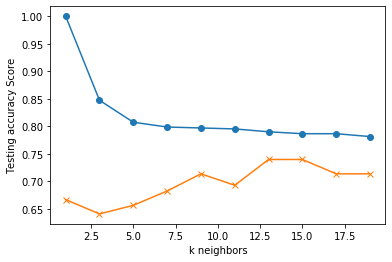

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
# YOUR CODE HERE

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

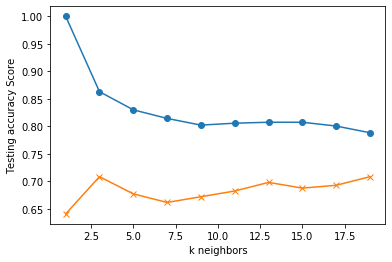

In [9]:
# Scale first
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k))
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()